In [1]:
import re
from pathlib import Path

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from hydra import compose, initialize

from src.analysis.utils import (
    get_elsevier_single_column_fig,
    get_elsevier_double_column_fig,
    get_elsevier_figure_with_subplots
)

In [2]:
plt.rcParams.update({
    "font.size": 9,
    'lines.linewidth': 1,
})

SAVE_FIGURES = True

In [3]:
SIGNALS_NAMES = {
    't': 'time (s)',
    'V': 'Voltage (V)',
    'I': 'Current (A)',
    'T': 'Temperature (°C)',
    'Qc': 'Charge Capacity (A.h)',
    'Qd': 'Discharge Capacity (A.h)'
}

SIGNALS_UNITIES = {
    't': 'Sec',
    'V': 'V',
    'I': 'A',
    'T': '°C',
    'Qc': 'A.h',
    'Qd': 'A.h'
}

In [4]:
with initialize(version_base=None, config_path='../../src/conf'):
    cfg = compose(config_name="config")

In [5]:
figures_folder = Path('../../') / cfg['analysis']['figures_folder']
cells_paths = Path('../../') / cfg['data']['processed_cells_data_folder']

In [6]:
example_cell = cfg['analysis']['example_cell']

In [7]:
cycles_data = pd.read_parquet(
    cells_paths / f"{example_cell}.parquet",
    engine='pyarrow'
)

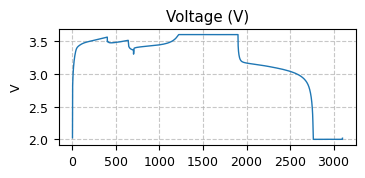

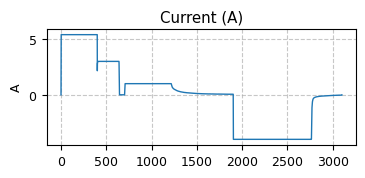

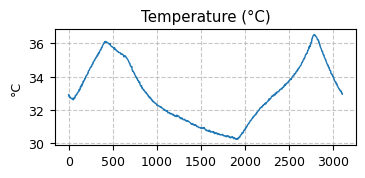

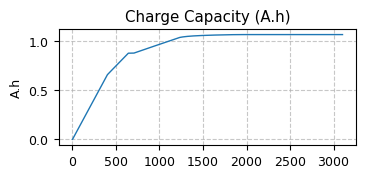

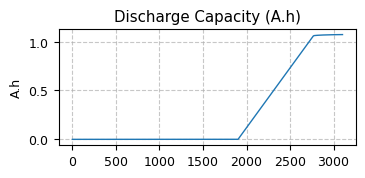

In [8]:
def plot_signal(cell_data, save_path, signal = 'V', cycle = 1):
    fig, ax = get_elsevier_single_column_fig(height_mm=42.5)

    cycle_data = cell_data[cell_data['cycle'] == cycle]

    t = cycle_data['t']
    signal_data = cycle_data[signal]

    ax.plot(t, signal_data, color='C0')
    ax.set_ylabel(SIGNALS_UNITIES[signal])
    ax.set_title(SIGNALS_NAMES[signal])
    ax.grid(True, linestyle='--', alpha=0.7)

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

plot_signal(
    cycles_data, 
    save_path=(
        figures_folder / 'voltage.png'
        if SAVE_FIGURES else None
    ),
    signal='V'
)

plot_signal(
    cycles_data, 
    save_path=(
        figures_folder / 'current.png'
        if SAVE_FIGURES else None
    ),
    signal='I'
)

plot_signal(
    cycles_data, 
    save_path=(
        figures_folder / 'temperature.png'
        if SAVE_FIGURES else None
    ),
    signal='T'
)

plot_signal(
    cycles_data, 
    save_path=(
        figures_folder / 'charge_cap.png'
        if SAVE_FIGURES else None
    ),
    signal='Qc'
)

plot_signal(
    cycles_data, 
    save_path=(
        figures_folder / 'discharge_cap.png'
        if SAVE_FIGURES else None
    ),
    signal='Qd'
)

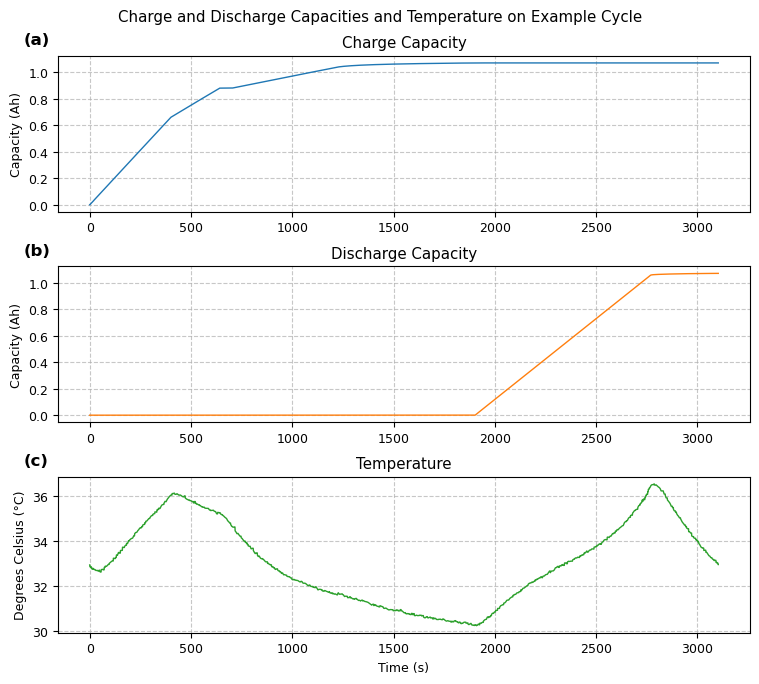

In [9]:
def plot_temperature_and_capacities(
    data: pd.DataFrame, 
    save_path: str = 'figures/temperature_and_capacities.png'
    ) -> None:
    """Plot voltage, current and temperature on the first cycle."""
    fig, ax = get_elsevier_figure_with_subplots(3, 1, column="double", spacing_factor=0.4)
    ax[0].text(-0.05, 1.15, '(a)', transform=ax[0].transAxes, fontsize=12, fontweight='bold', va='top')
    ax[1].text(-0.05, 1.15, '(b)', transform=ax[1].transAxes, fontsize=12, fontweight='bold', va='top')
    ax[2].text(-0.05, 1.15, '(c)', transform=ax[2].transAxes, fontsize=12, fontweight='bold', va='top')
    
    cycle_data = data[data['cycle'] == 1]

    t = cycle_data['t']
    
    T = cycle_data['T']
    Qc = cycle_data['Qc']
    Qd = cycle_data['Qd']

    ax[0].plot(t, Qc, label='Charge Capacity', color='C0')
    ax[0].set_ylabel('Capacity (Ah)')
    ax[0].set_title(f'Charge Capacity')
    ax[0].grid(True, linestyle='--', alpha=0.7)
    # ax[0].legend(handles=[ax[0].lines[0]], loc='upper right')

    ax[1].plot(t, Qd, label='Discharge Capacity', color='C1')
    ax[1].set_ylabel('Capacity (Ah)')
    ax[1].set_title(f'Discharge Capacity')
    ax[1].grid(True, linestyle='--', alpha=0.7)
    # ax[1].legend(handles=[ax[1].lines[0]], loc='upper right')
    
    ax[2].plot(t, T, label='Temperature', color='C2')
    ax[2].set_ylabel('Degrees Celsius (°C)')
    ax[2].set_title(f'Temperature')
    ax[2].grid(True, linestyle='--', alpha=0.7)
    # ax[2].legend(handles=[ax[2].lines[0]], loc='best')
    
    ax[2].set_xlabel('Time (s)')
    fig.suptitle('Charge and Discharge Capacities and Temperature on Example Cycle')
    if save_path is not None:
        plt.savefig(save_path, dpi=500, bbox_inches="tight")
    plt.show()

plot_temperature_and_capacities(
    cycles_data, 
    save_path=(
        figures_folder / 'temperature_and_capacities.png'
        if SAVE_FIGURES else None
    )
)

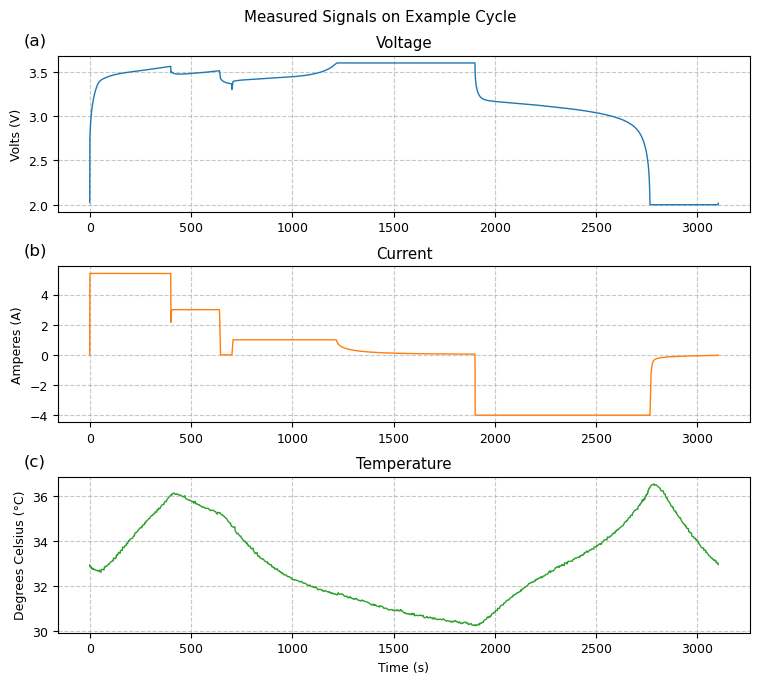

In [10]:
def plot_voltage_current_temperature(
    data: pd.DataFrame,
    save_path: str = 'figures/voltage_current_temperature.png'
    ) -> None:
    """Plot voltage, current and temperature on the first cycle."""
    fig, ax = get_elsevier_figure_with_subplots(3, 1, column="double", spacing_factor=0.4)
    ax[0].text(-0.05, 1.15, '(a)', transform=ax[0].transAxes, fontsize=12, va='top')
    ax[1].text(-0.05, 1.15, '(b)', transform=ax[1].transAxes, fontsize=12, va='top')
    ax[2].text(-0.05, 1.15, '(c)', transform=ax[2].transAxes, fontsize=12, va='top')
    
    cycle_data = data[data['cycle'] == 1]
    t = cycle_data['t']
    V = cycle_data['V']
    I = cycle_data['I']

    t = cycle_data['t']
    V = cycle_data['V']
    I = cycle_data['I']
    T = cycle_data['T']

    ax[0].plot(t, V, label='Voltage', color='C0')
    ax[0].set_ylabel('Volts (V)')
    ax[0].set_title(f'Voltage')
    ax[0].grid(True, linestyle='--', alpha=0.7)
    # ax[0].legend(handles=[ax[0].lines[0]], loc='upper right')

    ax[1].plot(t, I, label='Current', color='C1')
    ax[1].set_ylabel('Amperes (A)')
    ax[1].set_title(f'Current')
    ax[1].grid(True, linestyle='--', alpha=0.7)
    # ax[1].legend(handles=[ax[1].lines[0]], loc='upper right')
    
    ax[2].plot(t, T, label='Temperature', color='C2')
    ax[2].set_ylabel('Degrees Celsius (°C)')
    ax[2].set_title(f'Temperature')
    ax[2].grid(True, linestyle='--', alpha=0.7)
    # ax[2].legend(handles=[ax[2].lines[0]], loc='best')
    
    ax[2].set_xlabel('Time (s)')
    fig.suptitle('Measured Signals on Example Cycle')
    if save_path is not None:
        plt.savefig(save_path, dpi=500)
    plt.show()

plot_voltage_current_temperature(
    cycles_data, 
    save_path=(
        figures_folder / 'voltage_current_temperature.png'
        if SAVE_FIGURES else None
    )
)

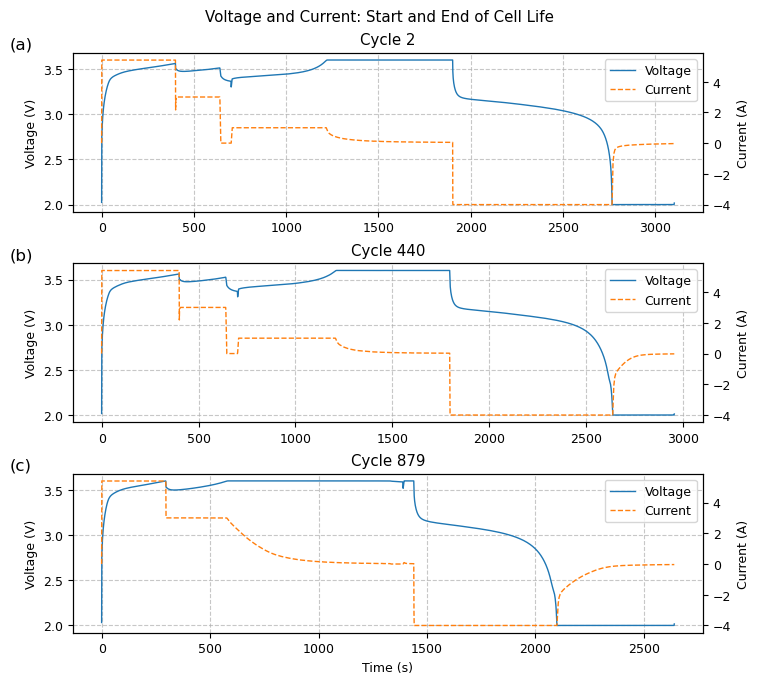

In [11]:
def plot_voltage_current_begin_and_end(
    data: pd.DataFrame,
    save_path: str = 'figures/voltage_current_begin_and_end.png'
    ) -> None:
    """Plot voltage and current for specified cycles."""
    fig, ax1 = get_elsevier_figure_with_subplots(3, 1, column="double", spacing_factor=0.4)
    ax1[0].text(-0.1, 1.1, '(a)', transform=ax1[0].transAxes, fontsize=12, va='top')
    ax1[1].text(-0.1, 1.1, '(b)', transform=ax1[1].transAxes, fontsize=12, va='top')
    ax1[2].text(-0.1, 1.1, '(c)', transform=ax1[2].transAxes, fontsize=12, va='top')
    
    ax2 = [ax1[0].twinx(), ax1[1].twinx(), ax1[2].twinx()]
    
    cycle_args = []
    cycle1_arg = min(data['cycle'].unique())
    cycle2_arg = int(np.median(data['cycle'].unique()))
    cycle3_arg = max(data['cycle'].unique())
        
    cycle_args.append(cycle1_arg)
    cycle_args.append(cycle2_arg)
    cycle_args.append(cycle3_arg)
    
    for idx, cycle_arg in enumerate(cycle_args):
        
        cycle_data = data[data['cycle'] == cycle_arg]
        t = cycle_data['t']
        V = cycle_data['V']
        I = cycle_data['I']
        ax1[idx].plot(t, V, label='Voltage', color='#1f77b4')
        ax2[idx].plot(t, I, label='Current', linestyle='--', color='#ff7f0e')
        ax1[idx].set_ylabel('Voltage (V)')
        ax2[idx].set_ylabel('Current (A)')
        ax1[idx].set_title(f'Cycle {cycle_arg+1}')
        ax1[idx].grid(True, linestyle='--', alpha=0.7)
        ax2[idx].grid(False)
        ax1[idx].legend(handles=[ax1[idx].lines[0], ax2[idx].lines[0]], loc='upper right')
    
    ax1[-1].set_xlabel('Time (s)')
    fig.suptitle('Voltage and Current: Start and End of Cell Life')
    if save_path is not None:
        plt.savefig(save_path, dpi=500)
    plt.show()


plot_voltage_current_begin_and_end(
    cycles_data, 
    save_path=(
        figures_folder / 'voltage_current_begin_and_end.png'
        if SAVE_FIGURES else None
    )
)

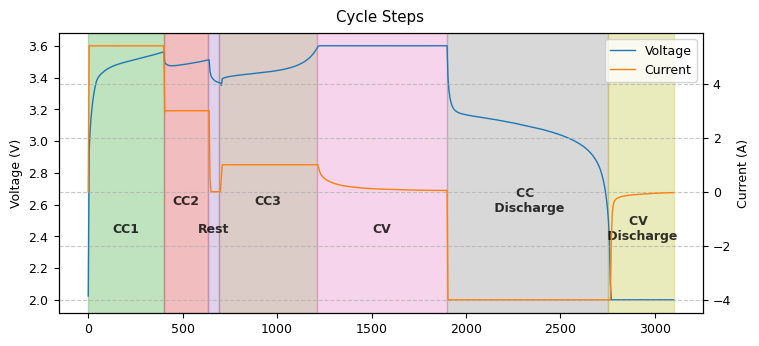

In [30]:
def plot_charge_steps(
    data: pd.DataFrame,
    save_path: str = 'figures/voltage_current.png'
    ) -> None:
    """Plot voltage and current for specified cycles."""
    fig, ax1 = get_elsevier_double_column_fig()
    ax2 = ax1.twinx()
    cycle_data = data[data['cycle'] == 1]
    t = cycle_data['t']
    V = cycle_data['V']
    I = cycle_data['I']
    
    new_t = np.arange(0, t.max(), 5)
    new_V = np.interp(new_t, t, V)
    new_I = np.interp(new_t, t, I)
    
    (l1, ) = ax1.plot(new_t, new_V, label='Voltage', color='#1f77b4')
    (l2, ) = ax2.plot(new_t, new_I, label='Current', color='#ff7f0e')
    
    span_regions = [
        (0, 400, 'CC1'),
        (400, 635, 'CC2'),
        (635, 690, 'Rest'),
        (690, 1210, 'CC3'),
        (1210, 1900, 'CV'),
        (1900, 2750, 'CC \n Discharge'),
        (2750, new_t[-1], 'CV \n Discharge'),
        #(3301, new_t[-1], 'Rest'),
    ]
    
    ymin, ymax = ax1.get_ylim()
    y_range = ymax - ymin
    
    for i, (start, end, label) in enumerate(span_regions):
        ax1.axvspan(start, end, alpha=0.3, color=f'C{i+2}')
        
        x_pos = (start + end) / 2
        
        # Alternate y position: even -> lower, odd -> upper
        if i % 2 == 0:
            y_pos = ymin + 0.3 * y_range  # Lower position
        else:
            y_pos = ymin + 0.4 * y_range  # Higher position

        ax1.text(
            x_pos, y_pos, label,
            ha='center', va='center',
            fontsize=9, fontweight='bold', 
            color='black', alpha=0.8
        )
    
    ax1.set_ylabel('Voltage (V)')
    ax2.set_ylabel('Current (A)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_xlabel('Time (s)')
    fig.suptitle('Cycle Steps')
    plt.legend(handles=[l1, l2], loc='upper right')
    if save_path is not None:
        plt.savefig(save_path, dpi=500)
    plt.show()

plot_charge_steps(
    cycles_data, 
    save_path=(
        figures_folder / 'charge_steps.png'
        if SAVE_FIGURES else None
    )
)

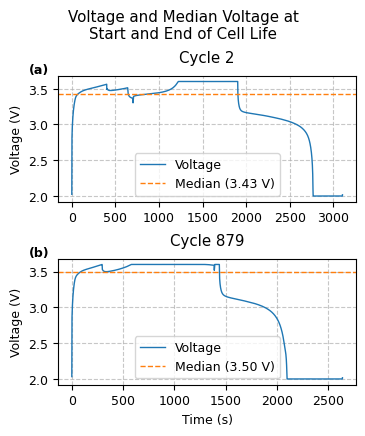

In [13]:
def plot_voltage_median(
    data: pd.DataFrame,
    save_path: str = 'figures/voltage_median.png'
    ) -> None:
    """Plot voltage and its median for specified cycles."""
    fig, ax = get_elsevier_figure_with_subplots(2, 1, column="single", spacing_factor=0.8)
    ax[0].text(-0.1, 1.1, '(a)', transform=ax[0].transAxes, fontweight='bold', va='top')
    ax[1].text(-0.1, 1.1, '(b)', transform=ax[1].transAxes, fontweight='bold', va='top')

    cycle1_arg = min(data['cycle'].unique())
    #cycle2_arg = int(np.median(data['cycle'].unique()))
    cycle3_arg = max(data['cycle'].unique())

    for idx, cycle in enumerate([cycle1_arg, cycle3_arg]):
        cycle_data = data[data['cycle'] == cycle]
        t = cycle_data['t']
        V = cycle_data['V']
        median_V = V.median()
        ax[idx].plot(t, V, label='Voltage', color='#1f77b4')
        ax[idx].axhline(y=median_V, label=f'Median ({median_V:.2f} V)', color='#ff7f0e', linestyle='--')
        ax[idx].set_ylabel('Voltage (V)')
        ax[idx].set_title(f'Cycle {cycle+1}', pad=10)
        ax[idx].grid(True, linestyle='--', alpha=0.7)
        ax[idx].legend()
    ax[1].set_xlabel('Time (s)')
    fig.suptitle('Voltage and Median Voltage at\nStart and End of Cell Life')
    if save_path is not None:
        plt.savefig(save_path, dpi=300)
    plt.show()

plot_voltage_median(
    cycles_data, 
    save_path=(
        figures_folder / 'voltage_median.png'
        if SAVE_FIGURES else None
    )
)

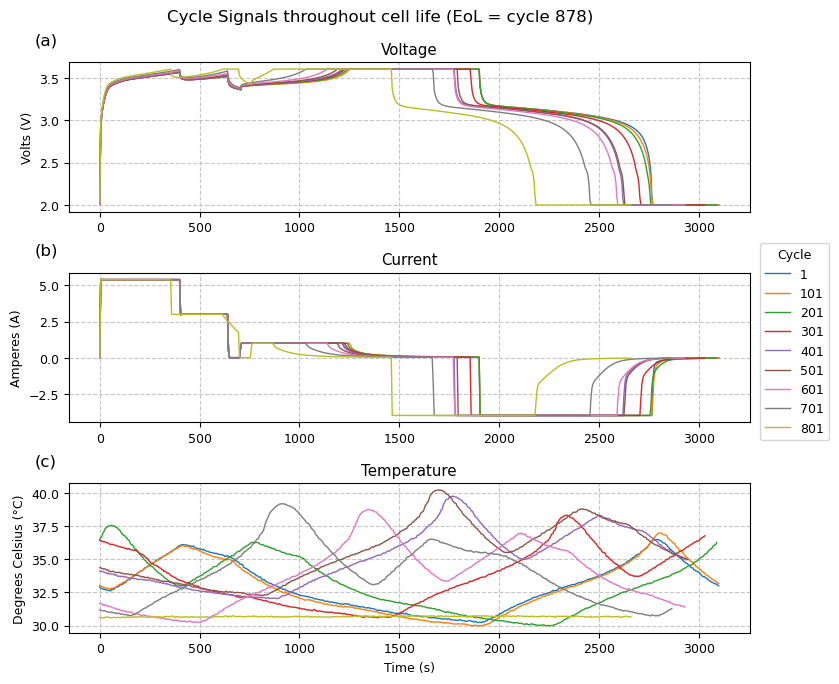

In [14]:
def plot_signals_through_cycles(
    data: pd.DataFrame,
    save_path: str = None
) -> None:
    fig, ax = get_elsevier_figure_with_subplots(3, 1, column="double", spacing_factor=0.4)
    ax[0].text(-0.05, 1.2, '(a)', transform=ax[0].transAxes, fontsize=12, va='top')
    ax[1].text(-0.05, 1.2, '(b)', transform=ax[1].transAxes, fontsize=12, va='top')
    ax[2].text(-0.05, 1.2, '(c)', transform=ax[2].transAxes, fontsize=12, va='top')

    cycles = sorted(list(data['cycle'].unique()))
    plot_cycles = cycles[::100]
    
    handles = []
    for i, cycle in enumerate(plot_cycles):
        cycle_data = data[data['cycle'] == cycle]
        t = cycle_data['t']
        V = cycle_data['V']
        I = cycle_data['I']
        T = cycle_data['T']
        
        new_t = np.arange(0, t.max(), 5)
        new_V = np.interp(new_t, t, V)
        new_I = np.interp(new_t, t, I)
        new_T = np.interp(new_t, t, T)

        # Plot all three curves on same subplot
        (l, ) = ax[0].plot(new_t, new_V, label=cycle, color=f"C{i}")
        ax[0].set_ylabel('Volts (V)')
        ax[0].set_title('Voltage')
        ax[0].grid(True, linestyle='--', alpha=0.7)
        
        ax[1].plot(new_t, new_I, label=cycle, color=f"C{i}")
        ax[1].set_ylabel('Amperes (A)')
        ax[1].set_title('Current')
        ax[1].grid(True, linestyle='--', alpha=0.7)
        
        ax[2].plot(new_t, new_T, label=cycle, color=f"C{i}")
        ax[2].set_xlabel('Time (s)')
        ax[2].set_title('Temperature')
        ax[2].set_ylabel('Degrees Celsius (°C)')
        ax[2].grid(True, linestyle='--', alpha=0.7)
        
        handles.append(l)

    fig.legend(
        handles=handles,
        loc='center left', 
        bbox_to_anchor=(1, 0.5),
        title='Cycle'
        )
    fig.suptitle(f'Cycle Signals throughout cell life (EoL = cycle {len(cycles)})', fontsize=12)
    if save_path is not None:
        fig.savefig(save_path, bbox_inches='tight', dpi=500)
    plt.show()
    
plot_signals_through_cycles(
    cycles_data, 
    save_path=(
        figures_folder / 'signals_through_cycles.png'
        if SAVE_FIGURES else None
    )
)